In [5]:
from app.online.topic_detection_service import topic_detection_service

✅ Loaded tf-idf for antique
✅ Loaded topic detection for antique
✅ Loaded tf-idf for quora
✅ Loaded topic detection for quora


In [4]:
def get_visualization_data(dataset_name):
    lda_model = topic_detection_service.lda_models.get(dataset_name)
    doc_topics = topic_detection_service.doc_topics.get(dataset_name)
    doc_vectors = topic_detection_service.doc_vectors.get(dataset_name) # This is the TF-IDF DTM

    if lda_model is None or doc_topics is None or doc_vectors is None:
        print(f"Missing data for visualization for dataset '{dataset_name}'.")
        return None, None, None

    try:
        from app.online.tfidf_service import tfidf_service # Import here for local scope or ensure global access
        tfidf_vectorizer = tfidf_service.vectorizers.get(dataset_name)
        if tfidf_vectorizer is None:
            print(f"TF-IDF Vectorizer for '{dataset_name}' not found in tfidf_service. Cannot visualize.")
            return None, None, None
    except ImportError:
        print("Could not import tfidf_service. Make sure it's accessible and loaded.")
        return None, None, None
    
    return lda_model, doc_vectors, tfidf_vectorizer 

In [3]:
import os
import json

def get_processed_dataset(name):
    print(f"\nProcessing {name} dataset...")
    json_path = os.path.join("app", "processed_datasets", f"{name}.json")
    if not os.path.exists(json_path):
        print(f"❌ Processed JSON file not found for {name}")
        return

    with open(json_path, 'r', encoding='utf-8') as f:
        corpus_data = json.load(f)
    return corpus_data

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# -----------------------------------------------------------
# الجزء 1: عرض توزيع المواضيع باستخدام Matplotlib/Seaborn
# -----------------------------------------------------------

print("1. عرض توزيع المواضيع باستخدام Matplotlib/Seaborn")

lda_model, doc_vectors_tfidf, tfidf_vectorizer = get_visualization_data("quora")


# استخراج توزيعات المواضيع لكل وثيقة
doc_topic_distributions = []
for text in get_processed_dataset("quora").values():
    vector = tfidf_vectorizer.transform([text])
    topic_prob = lda_model.transform(vector)
    doc_topic_distributions.append(topic_prob[0])

1. عرض توزيع المواضيع باستخدام Matplotlib/Seaborn

Processing quora dataset...


In [23]:
doc_topic_distributions = [x[0] for x in doc_topic_distributions]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15584\3063248530.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(range(lda_model.n_components)), y=topic_proportions, palette='viridis')


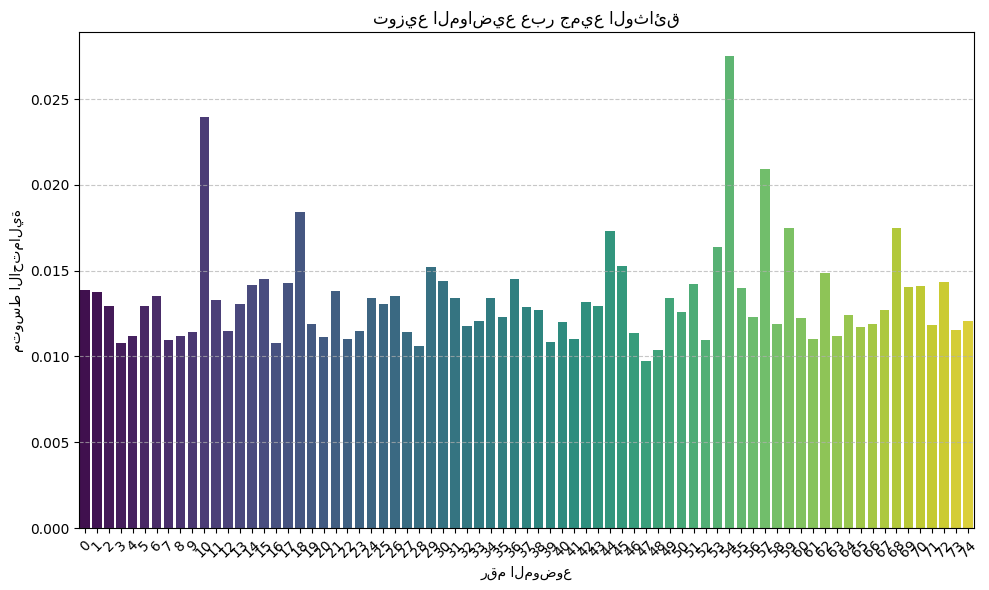

In [7]:
doc_topic_matrix = np.array(doc_topic_distributions)
topic_proportions = np.mean(doc_topic_matrix, axis=0)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(range(lda_model.n_components)), y=topic_proportions, palette='viridis')
plt.title('توزيع المواضيع عبر جميع الوثائق')
plt.xlabel('رقم الموضوع')
plt.ylabel('متوسط الاحتمالية')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [8]:
import pyLDAvis.lda_model # This is the key change!


vis_data = pyLDAvis.lda_model.prepare(
    lda_model, 
    doc_vectors_tfidf,  # This is your DTM (TF-IDF matrix)
    tfidf_vectorizer,   # This is your TfidfVectorizer
    mds='tsne',         # t-SNE often gives better separation than MDS for visualization
    R=30,                # Number of relevant terms to display
)



In [9]:
# pyLDAvis.display(vis_data)
pyLDAvis.show(vis_data,local=False) # Force HTML rendering



Serving to http://127.0.0.1:8888/    [Ctrl-C to exit]


127.0.0.1 - - [12/Jul/2025 20:24:04] "GET / HTTP/1.1" 200 -



stopping Server...
